<a href="https://colab.research.google.com/github/Pankajisharwal/Major-Project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **E-Commerce Sales Data Analysis**

## PHASE 1: Setup and Import **Libraries**

In [4]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## PHASE 2: Upload and Load the Data

### Step 2.1: Upload the CSV Files

In [22]:
# Upload the CSV files from local system
from google.colab import files
uploaded = files.upload()
uploaded = files.upload()

Saving Sales_data.csv to Sales_data (2).csv


Saving Customer_data.csv to Customer_data (2).csv


### Step 2.2: Load the CSVs into DataFrames

In [23]:
sales_df = pd.read_csv('Sales_data.csv')
customer_df = pd.read_csv('Customer_data.csv')

# Preview
sales_df.head(3)



,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI


In [24]:
customer_df.head(3)

,Order ID,Order Date,CustomerName,State,City
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura
1,B-25993,03-02-2018,Madhav,Delhi,Delhi
2,B-25973,24-01-2018,Madan Mohan,Uttar Pradesh,Mathura


## PHASE 3: Clean and Merge the Data

### Step 3.1: Check for Nulls

In [25]:
print("Sales Data Nulls:\n", sales_df.isnull().sum())
print("\nCustomer Data Nulls:\n", customer_df.isnull().sum())

Sales Data Nulls:
 Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
dtype: int64

Customer Data Nulls:
 Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
dtype: int64


### Step 3.2: Clean Data

In [26]:
# Drop duplicate Order IDs if needed
sales_df.drop_duplicates(subset='Order ID', inplace=True)
customer_df.drop_duplicates(subset='Order ID', inplace=True)

### Step 3.3: Convert Dates to datetime

In [29]:
customer_df['Order Date'] = pd.to_datetime(customer_df['Order Date'], format="%d-%m-%Y")



### Step 3.4: Merge Both DataFrames

In [31]:
df = pd.merge(sales_df, customer_df, on='Order ID', how='inner')
df.head(3)

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City
0,B-25681,1096,658,7,Electronics,Electronic Games,COD,2018-06-04,Bhawna,Madhya Pradesh,Indore
1,B-26055,5729,64,14,Furniture,Chairs,EMI,2018-03-10,Harivansh,Uttar Pradesh,Mathura
2,B-25955,2927,146,8,Furniture,Bookcases,EMI,2018-01-16,Shiva,Maharashtra,Pune


## **PHASE 4: Exploratory Data Analysis (EDA)**

### step 4.1: General Info and Statistics

In [35]:
df.info()
# Select only numeric columns (excludes datetime and string columns)
df.select_dtypes(include=[np.number]).describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      500 non-null    object        
 1   Amount        500 non-null    int64         
 2   Profit        500 non-null    int64         
 3   Quantity      500 non-null    int64         
 4   Category      500 non-null    object        
 5   Sub-Category  500 non-null    object        
 6   PaymentMode   500 non-null    object        
 7   Order Date    500 non-null    datetime64[ns]
 8   CustomerName  500 non-null    object        
 9   State         500 non-null    object        
 10  City          500 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 43.1+ KB


,Amount,Profit,Quantity
count,500.00000,500.000000,500.000000
mean,382.43600,37.450000,3.888000
std,564.72488,211.809154,2.236394
min,6.00000,-916.000000,1.000000
25%,52.00000,-14.250000,2.000000
50%,151.50000,8.000000,3.000000
75%,502.25000,52.250000,5.000000
max,5729.00000,1864.000000,14.000000


### Step 4.2: Total Revenue, Profit, and Quantity Sold

In [40]:
from IPython.display import display, HTML

total_revenue = df['Amount'].sum()
total_profit = df['Profit'].sum()
total_quantity = df['Quantity'].sum()

card_html = f"""
<div style="display:flex; gap:150px; margin: 20px 0; justify-content: center;">
  <div style="
    width: 150px; height: 150px;
    background:#4CAF50; color:white;
    padding:20px; border-radius:15px;
    box-shadow: 2px 2px 8px rgba(0,0,0,0.15);
    display: flex; flex-direction: column; justify-content: center; align-items: center;
    text-align: center;
  ">
    <h3 style="margin:0 0 10px 0;">Total Revenue</h3>
    <p style="font-size: 24px; font-weight: bold; margin: 0;">₹{total_revenue:,.2f}</p>
  </div>
  <div style="
    width: 150px; height: 150px;
    background:#2196F3; color:white;
    padding:20px; border-radius:15px;
    box-shadow: 2px 2px 8px rgba(0,0,0,0.15);
    display: flex; flex-direction: column; justify-content: center; align-items: center;
    text-align: center;
  ">
    <h3 style="margin:0 0 10px 0;">Total Profit</h3>
    <p style="font-size: 24px; font-weight: bold; margin: 0;">₹{total_profit:,.2f}</p>
  </div>
  <div style="
    width: 150px; height: 150px;
    background:#FF5722; color:white;
    padding:20px; border-radius:15px;
    box-shadow: 2px 2px 8px rgba(0,0,0,0.15);
    display: flex; flex-direction: column; justify-content: center; align-items: center;
    text-align: center;
  ">
    <h3 style="margin:0 0 10px 0;">Total Quantity Sold</h3>
    <p style="font-size: 24px; font-weight: bold; margin: 0;">{total_quantity:,}</p>
  </div>
</div>
"""

display(HTML(card_html))



## PHASE 5: Visual Analysis

### *Monthly Profit and Loss*

---



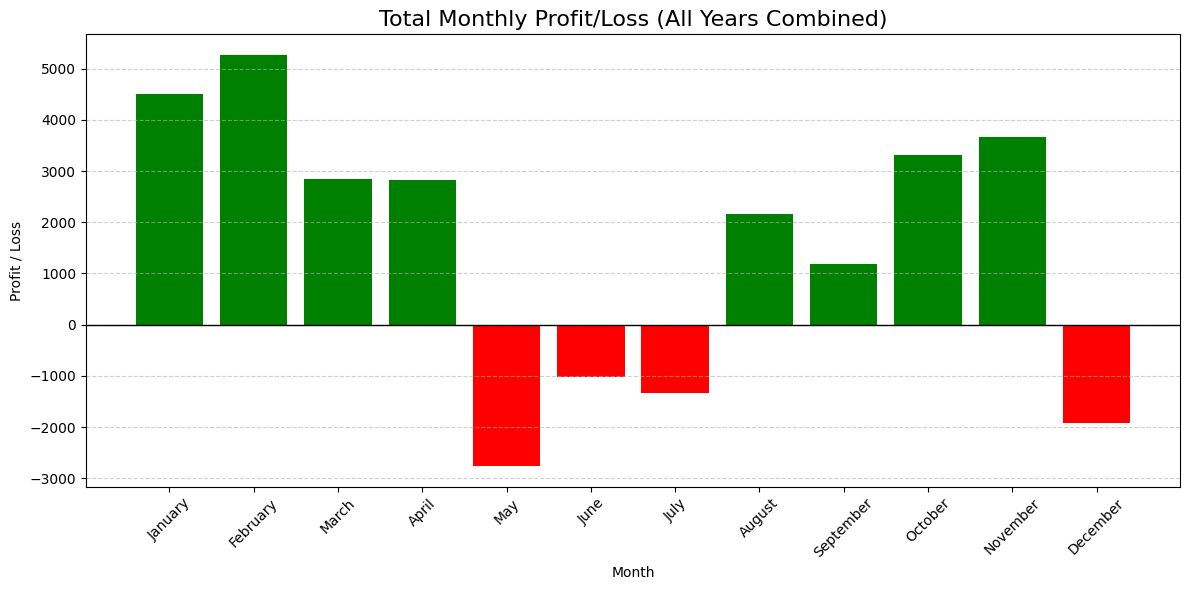

In [44]:
# Step 1: Extract month name and number to sort properly
df['Month'] = df['Order Date'].dt.month_name()
df['Month_Num'] = df['Order Date'].dt.month

# Step 2: Group by month name and sum profit
monthly_profit = df.groupby(['Month_Num', 'Month'])['Profit'].sum().reset_index()

# Step 3: Sort by Month_Num to get Jan to Dec order
monthly_profit.sort_values('Month_Num', inplace=True)

# Step 4: Plot bar chart
plt.figure(figsize=(12,6))
colors = ['green' if p >= 0 else 'red' for p in monthly_profit['Profit']]

plt.bar(monthly_profit['Month'], monthly_profit['Profit'], color=colors)
plt.title('Total Monthly Profit/Loss (All Years Combined)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Profit / Loss')
plt.xticks(rotation=45)
plt.axhline(0, color='black', linewidth=1)  # Baseline for zero
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### *Sales by Category*

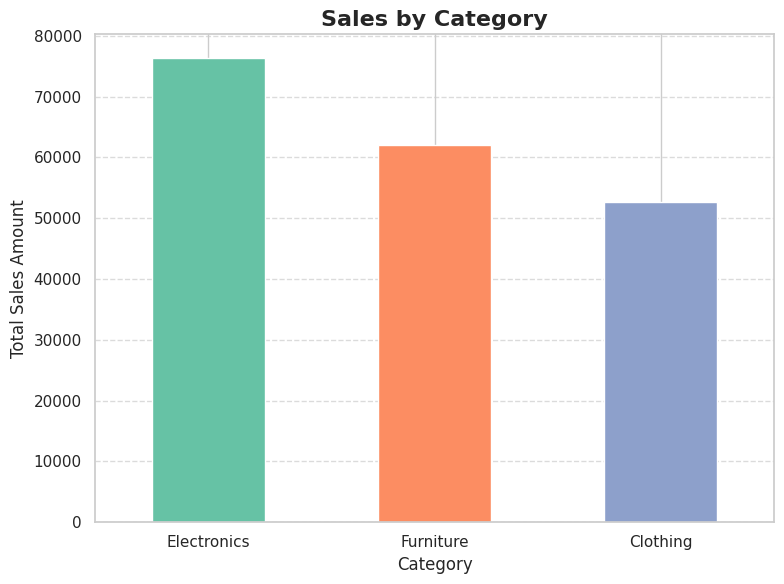

In [48]:
display(HTML("<div style='text-align:center;'>"))

plt.figure(figsize=(8,6))
sns.set_theme(style="whitegrid")
cat_sales = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)

colors = sns.color_palette("Set2")
cat_sales.plot(kind='bar', color=colors)
plt.title('Sales by Category', fontsize=16, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

display(HTML("</div>"))



### *Sales by Sub-Category*

<ipython-input-50-04716e3ccf0e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


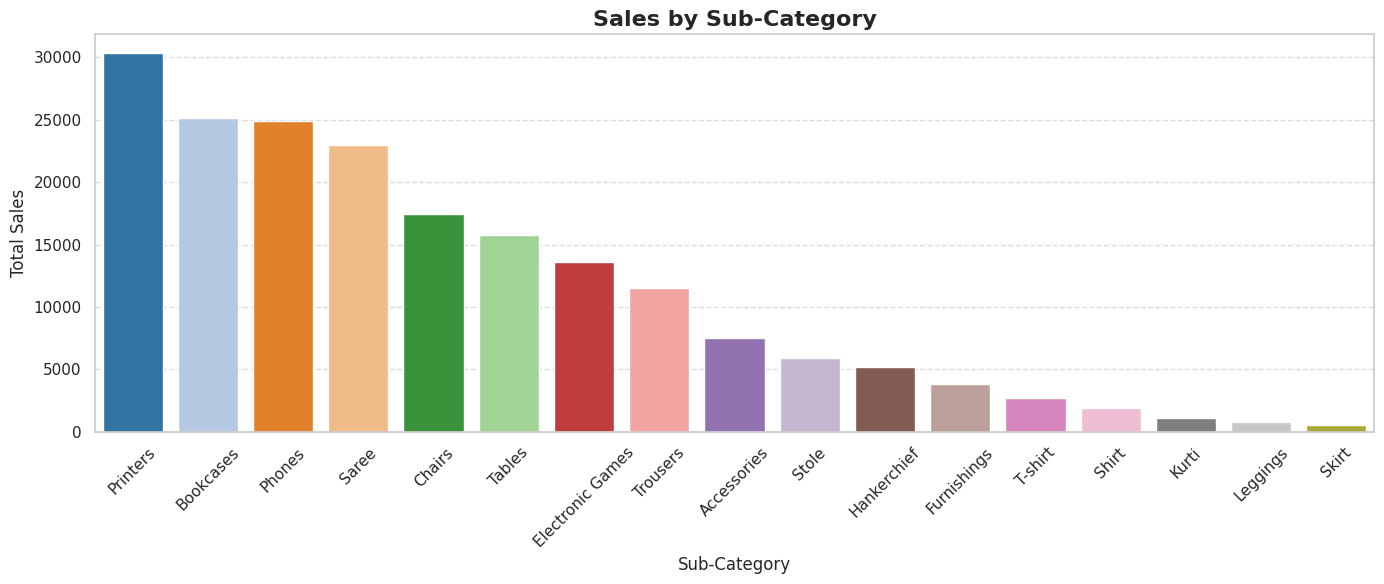

In [50]:
# Get total sales by Sub-Category
subcat_sales = df.groupby('Sub-Category')['Amount'].sum().reset_index()

# Sort to make it cleaner
subcat_sales = subcat_sales.sort_values('Amount', ascending=False)

# Plot with unique colors for each bar
plt.figure(figsize=(14,6))
sns.set(style='whitegrid')

# Assign unique colors using a vibrant palette
colors = sns.color_palette('tab20', len(subcat_sales))

# Bar plot with custom colors
sns.barplot(
    data=subcat_sales,
    x='Sub-Category',
    y='Amount',
    palette=colors
)

plt.title('Sales by Sub-Category', fontsize=16, fontweight='bold')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### *Sales Over Time*

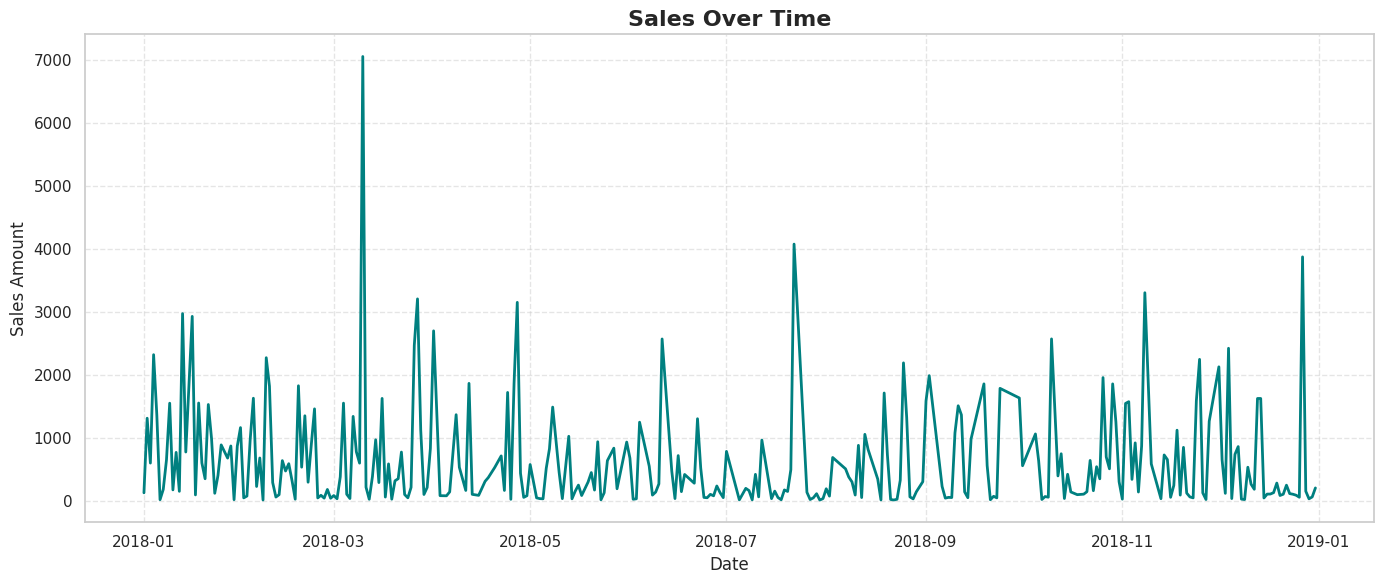

In [51]:
time_series = df.groupby('Order Date')['Amount'].sum().reset_index()

plt.figure(figsize=(14,6))
plt.plot(time_series['Order Date'], time_series['Amount'], color='teal', linewidth=2)
plt.title('Sales Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### *Top 5 States by Sales*

<ipython-input-60-fadc34744909>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_sales.values, y=state_sales.index, palette='viridis')


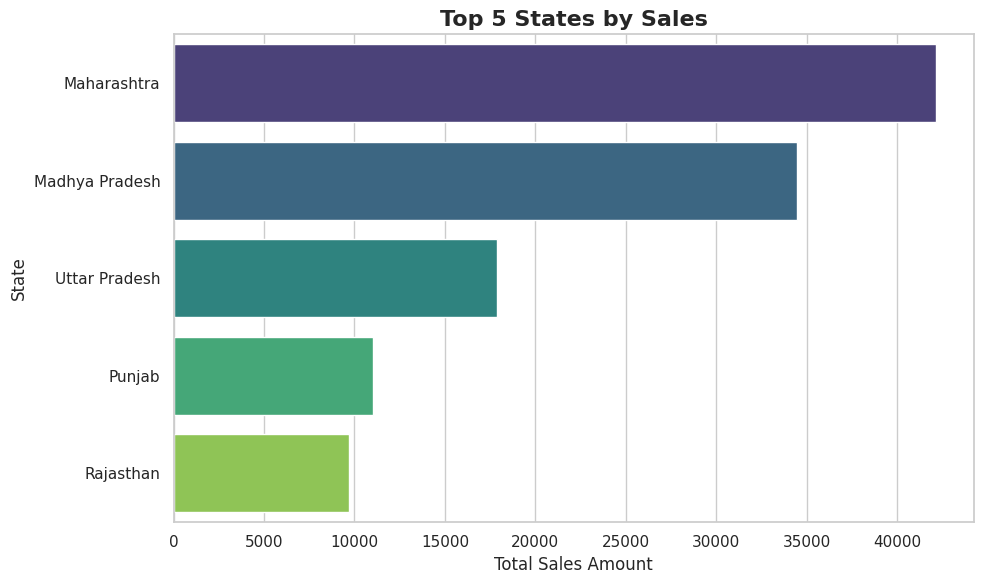

In [60]:
state_sales = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10,6))
sns.barplot(x=state_sales.values, y=state_sales.index, palette='viridis')
plt.title("Top 5 States by Sales", fontsize=16, fontweight='bold')
plt.xlabel("Total Sales Amount")
plt.ylabel("State")
plt.tight_layout()
plt.show()


### *Quantity by Payment Mode*

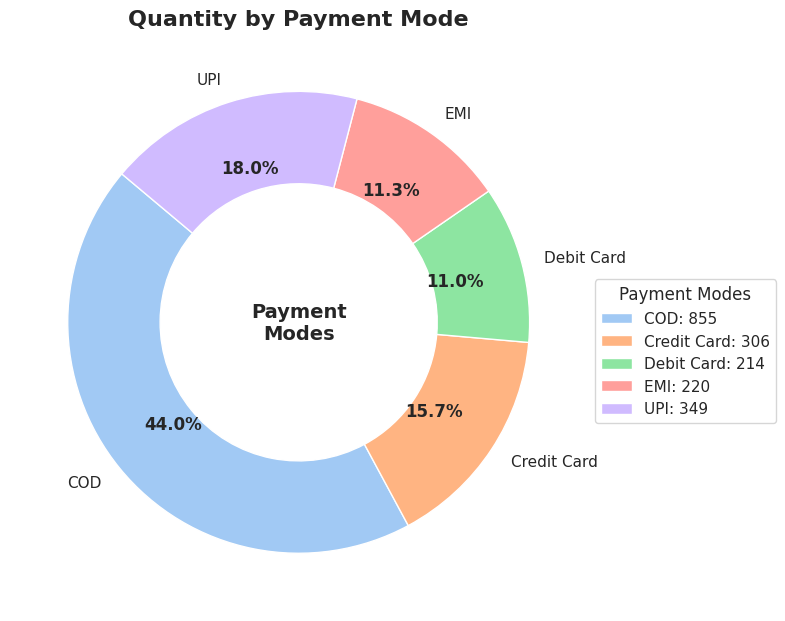

In [94]:
# Aggregate Quantity by Payment Mode
payment_quantity = df.groupby('PaymentMode')['Quantity'].sum().reset_index()

# Define data
labels = payment_quantity['PaymentMode']
sizes = payment_quantity['Quantity']
colors = sns.color_palette('pastel')[0:len(sizes)]

# Create figure
fig, ax = plt.subplots(figsize=(8,8))
wedges, texts = ax.pie(
    sizes,
    labels=labels,
    startangle=140,
    colors=colors,
    wedgeprops={'width': 0.4}
)

# Draw center circle
plt.text(0, 0, 'Payment\nModes', ha='center', va='center', fontsize=14, fontweight='bold')

# Add percentage labels inside the wedges
total = sum(sizes)
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    x = np.cos(np.deg2rad(ang)) * 0.7
    y = np.sin(np.deg2rad(ang)) * 0.7
    percentage = f"{100*sizes[i]/total:.1f}%"
    ax.text(x, y, percentage, ha='center', va='center', fontsize=12, weight='bold')

# Add legend with actual quantity values
ax.legend(
    [f"{labels[i]}: {sizes[i]}" for i in range(len(labels))],
    title="Payment Modes",
    loc="center left",
    bbox_to_anchor=(1, 0.45)
)
plt.title('Quantity by Payment Mode', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()



### *Profit by Sub-categories*

<ipython-input-68-cbe7066c3bf9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


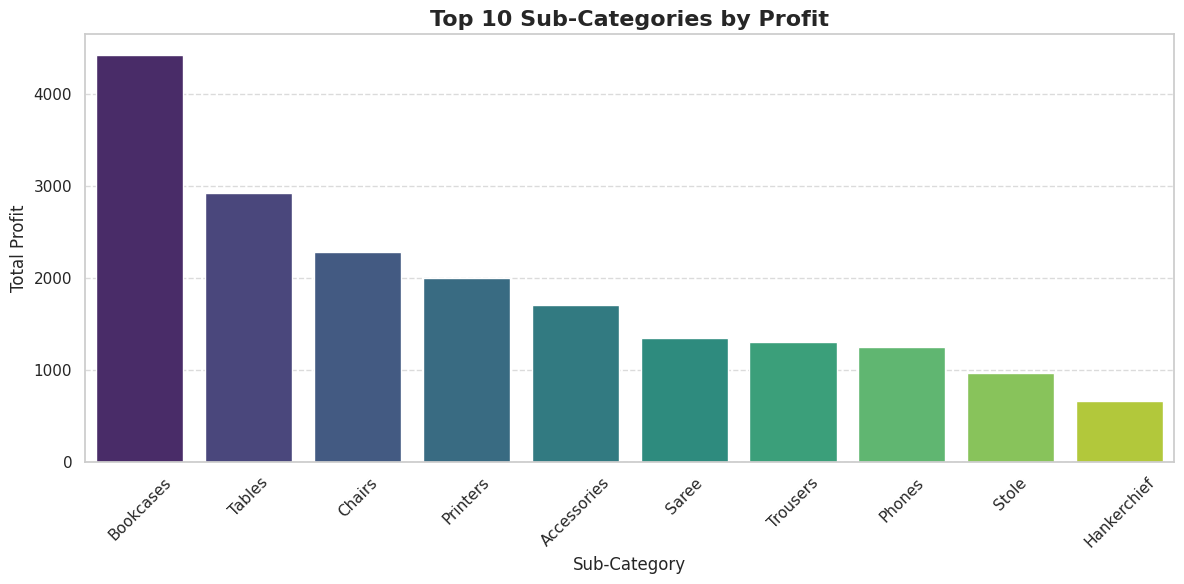

In [68]:
plt.figure(figsize=(12,6))
sns.barplot(
    x=top_subcats_profit.head(10).index,
    y=top_subcats_profit.head(10).values,
    palette='viridis'
)
plt.title('Top 10 Sub-Categories by Profit', fontsize=16, fontweight='bold')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# **PHASE 6: Business Insights & Correlations**

### *Profit Margin Analysis by Category*

In [83]:
df['ProfitMargin'] = df['Profit'] / df['Amount']

margin_by_cat = df.groupby('Category')['ProfitMargin'].mean().reset_index().sort_values(by='ProfitMargin', ascending=False)

fig = px.bar(margin_by_cat, x='Category', y='ProfitMargin',
             title='Average Profit Margin by Category',
             color='ProfitMargin', color_continuous_scale='Blues',
             text=margin_by_cat['ProfitMargin'].apply(lambda x: f"{x:.2%}"))
fig.update_traces(textposition='outside')
fig.show()



### *Quarterly and Monthly Sales*

In [74]:
fig = px.bar(
    monthly_sales,
    x='Month',
    y='Amount',
    title='Monthly Sales Overview',
    labels={'Amount': 'Sales Amount ($)', 'Month': 'Month'},
    color='Amount',
    color_continuous_scale='Viridis',
    template='plotly_white',
    text=monthly_sales['Amount'].apply(lambda x: f"${x:,.0f}")
)

# Improve layout
fig.update_traces(textposition='outside')
fig.update_layout(
    title_font_size=20,
    xaxis_title_font_size=16,
    yaxis_title_font_size=16,
    coloraxis_colorbar=dict(title="Sales Amount"),
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

fig.show()


### *Payment Mode vs Profitability*

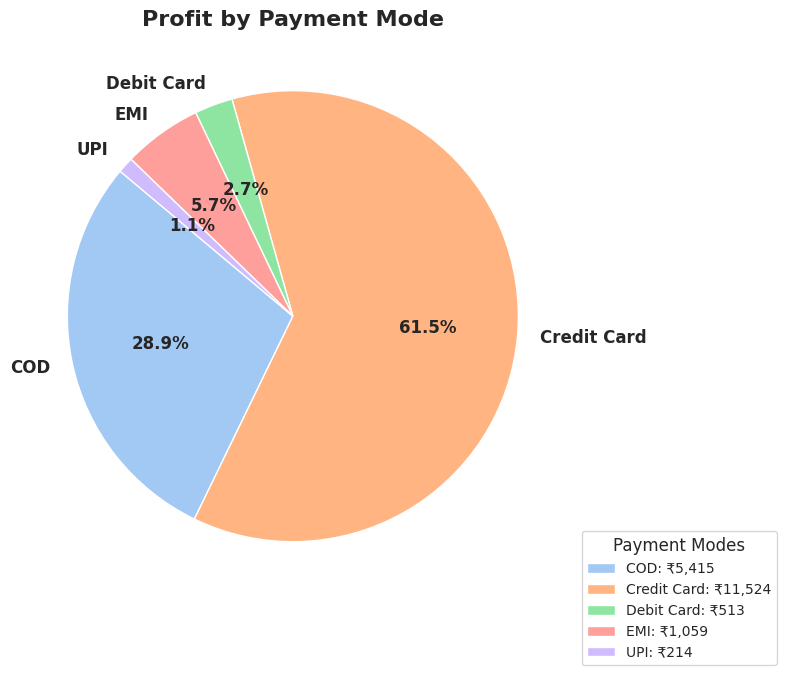

In [95]:
# Step 1: Aggregate Profit by Payment Mode
payment_profit = df.groupby('PaymentMode')['Profit'].sum().reset_index()

# Step 2: Prepare data
labels = payment_profit['PaymentMode']
sizes = payment_profit['Profit']
colors = sns.color_palette('pastel')[0:len(sizes)]

# Step 3: Create standard pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12, 'weight': 'bold'}
)

# Step 4: Add title
plt.title('Profit by Payment Mode', fontsize=16, fontweight='bold')

# Step 5: Add legend with exact profit values
ax.legend(
    [f"{labels[i]}: ₹{sizes[i]:,.0f}" for i in range(len(labels))],
    title="Payment Modes",
    loc="center left",
    bbox_to_anchor=(1, 0),
    fontsize=10
)

plt.tight_layout()
plt.show()

